<a href="https://colab.research.google.com/github/pyefiuna/Laboratorio/blob/master/notebooks/Semana%204/Ejercicios_Propuestos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.stats import norm, binom
from math import sqrt, ceil
import random
import matplotlib.pyplot as plt
import numpy as np

# Ejercicio 1

Un experimento consiste en lanzar un dado varias veces. Determine la
probabilidad de que aparezca:

## Ítem a
La cara 6, entre 29 y 32 inclusive, si el dado es lanzado 180 veces.

In [2]:
N = 180 # número de ensayos
p = 1/6 # probabilidad de éxito
q = 1-p # probabilidad de fallar
mu = N*p # media
sigma = sqrt(N*p*q) # desviación estándar
dist_dados = norm(loc = mu, scale = sigma) # distribución normal

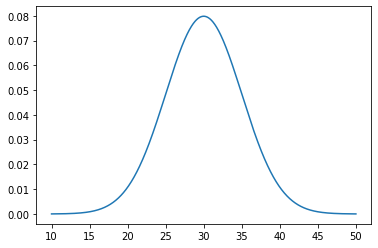

In [3]:
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
plt.plot(x, dist_dados.pdf(x))
plt.show()

In [4]:
print(f'Probabilidad: {(dist_dados.cdf(32.5)-dist_dados.cdf(28.5))*100} %')

Probabilidad: 30.937388346296572 %


## Ítem b
La cara 6, menos de 22 veces, si el dado es lanzado 180 veces.

In [5]:
print(f'Probabilidad: {dist_dados.cdf(21.5)*100} %')

Probabilidad: 4.456546275854304 %


## Ítem c
La cara 6, exactamente 30 veces, si el dado es lanzado 180 veces.

In [6]:
print(f'Probabilidad: {(dist_dados.cdf(30.5)-dist_dados.cdf(29.5))*100} %')

Probabilidad: 7.965567455405798 %


## Comprobación de los resultados

In [7]:
pruebas = [random.randint(1,6) for i in range(N)] # se hacen 180 ensayos con distribución uniforme
print(pruebas)

[1, 2, 4, 6, 2, 3, 3, 6, 5, 5, 3, 3, 1, 2, 1, 4, 3, 4, 2, 2, 4, 2, 5, 4, 5, 5, 1, 2, 4, 6, 1, 5, 6, 2, 6, 5, 2, 1, 4, 4, 4, 3, 2, 2, 5, 2, 5, 3, 5, 6, 5, 2, 1, 6, 2, 2, 6, 4, 3, 3, 6, 5, 5, 4, 3, 6, 2, 2, 1, 2, 1, 2, 1, 1, 3, 1, 4, 2, 4, 1, 2, 3, 1, 1, 4, 5, 4, 4, 3, 3, 4, 2, 5, 1, 6, 2, 1, 2, 6, 4, 5, 1, 1, 5, 3, 5, 4, 1, 2, 2, 2, 3, 6, 3, 1, 1, 6, 5, 6, 3, 2, 2, 4, 2, 5, 6, 6, 2, 5, 6, 2, 6, 3, 2, 2, 4, 6, 6, 3, 2, 4, 5, 2, 6, 3, 1, 1, 4, 1, 4, 1, 5, 5, 3, 5, 5, 3, 4, 6, 6, 4, 1, 1, 3, 4, 6, 6, 6, 4, 2, 4, 2, 1, 3, 3, 3, 3, 6, 2, 1]


In [8]:
pruebas.count(6)
# Para el ítem a, verificar si el número está entre 29 y 32 (esto ocurre con un 31 % de probabilidad)
# Para el ítem b, verificar si este número es menor que 22 (esto ocurre con un 4.5 % de probabilidad)
# Para el ítem c, verificar si este número es 30 (esto ocurre con un 8 % de probabilidad)
# Por ende, lo más probable es que se cumpla el ítem a (de cumplirse alguno de los ítems)

28

# Ejercicio 2

Una fábrica produce varillas de sección circular cuyo diámetro es una variable continua que sigue una distribución normal con media 1cm y desviación estándar 0,02 cm. Si se mide el diámetro de una varilla al azar:

## Ítem a
¿cuál es la probabilidad de que esté entre 1±0,003cm?

In [9]:
mu = 1 # media
sigma = 0.02 # desviación estándar
dist_varillas = norm(loc = mu, scale = sigma) # distribución normal

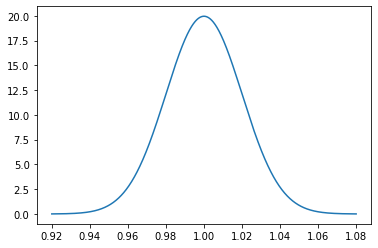

In [10]:
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
plt.plot(x, dist_varillas.pdf(x))
plt.show()

In [11]:
print(f'Probabilidad: {(dist_varillas.cdf(1+0.003)-dist_varillas.cdf(1-0.003))*100} %')

Probabilidad: 11.923538474048295 %


## Ítem b
¿y de que sea menos de 0,98 cm?

In [12]:
print(f'Probabilidad: {dist_varillas.cdf(0.98)*100} %')

Probabilidad: 15.865525393145685 %


## Ítem c
Si se toman 10 varillas al azar, hallar la probabilidad de que exactamente 2 tengan menos de 0,98 cm de diámetro.

In [13]:
prob_menos_de_098 = dist_varillas.cdf(0.98)
print(f'Probabilidad: {binom.pmf(2, 10, prob_menos_de_098)*100} %')

Probabilidad: 28.438934902619234 %


# Ejercicio 3

Una fábrica produce en cada turno 100.000 piezas de forma que la
probabilidad de que una sea defectuosa es 0,04. En el control de calidad se
revisan todas las piezas y se depositan las defectuosas en un recipiente que
se vacía al final de cada turno. ¿Cuántas piezas ha de contener el recipiente
para que la probabilidad de que su capacidad no se vea rebasado al final de
cada turno sea mayor a 0,95?

In [14]:
N = 100000 # número de piezas
p = 0.04 # probabilidad de que sea defectuosa
q = 1-q # probabilidad de que sea buena
mu = N*p # media
sigma = sqrt(N*p*q) # desviación estándar
dist_piezas = norm(loc = mu, scale = sigma) # distribución normal

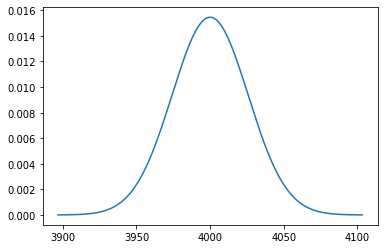

In [15]:
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
plt.plot(x, dist_piezas.pdf(x))
plt.show()

In [16]:
prob_rebasado = 1-0.95
print(f'Cantidad de piezas: {ceil(dist_piezas.isf(prob_rebasado))}')
# se usa la función ceil (techo) para redondear hacia arriba la cantidad de piezas

Cantidad de piezas: 4043


## Comprobación del resultado

A continuación, se cuenta la cantidad de piezas que salen defectuosas, considerando que cada pieza es defectuosa con una probabilidad del 4%. Se toman 100.000 piezas como muestra y se obtiene un array de ceros y unos. Si se suman todos los elementos de este array, el resultado es la cantidad de piezas defectuosas (la cual esperamos que sea menor que el resultado 4102 en un 95 % de las veces.

In [17]:
binom.rvs(n = 1, p = p, loc=0, size=100000).sum() # se cuenta la cantidad de veces que salen piezas defectuosas

4047